In [18]:
import pandas as pd

from plv.data import load_verbraucherpreisindex

# Load

In [2]:
data = load_verbraucherpreisindex(filter_columns=None)
data = data[data["inflation"].notna()].copy()

# Plot

In [3]:
import matplotlib.pyplot as plt

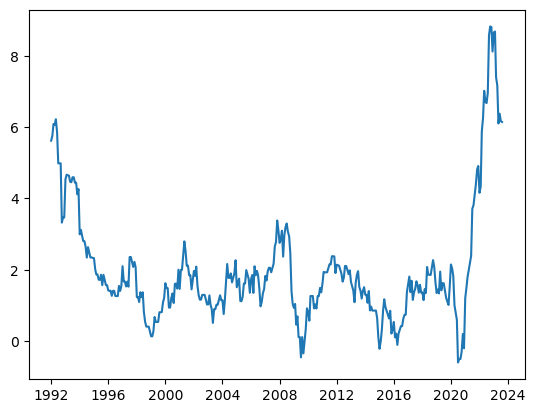

In [4]:
plt.plot(data.index, data["inflation"])

# Investigate PACF

In [14]:
filter_ = slice("1995", "2020")

In [15]:
data.loc[filter_]

,Statistik_Code,Statistik_Label,Zeit_Code,Zeit_Label,Zeit,1_Merkmal_Code,1_Merkmal_Label,1_Auspraegung_Code,1_Auspraegung_Label,2_Merkmal_Code,2_Merkmal_Label,2_Auspraegung_Code,2_Auspraegung_Label,PREIS1__Verbraucherpreisindex__2020=100,PREIS1__CH0004,PREIS1__CH0005,vpi,inflation,monthly_Inflation
dt,,,,,,,,,,,,,,,,,,,
1995-01-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1995,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT01,Januar,70.4,"2,3","0,4",70.4,2.325581,0.42796
1995-02-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1995,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT02,Februar,70.8,"2,0","0,6",70.8,2.017291,0.568182
1995-03-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1995,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT03,März,70.8,"1,9",-,70.8,1.870504,0.0
1995-04-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1995,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT04,April,70.9,"1,9","0,1",70.9,1.867816,0.141243
1995-05-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,1995,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT05,Mai,70.9,"1,7",-,70.9,1.721664,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,2020,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT08,August,99.7,"-0,5",-,99.7,-0.499002,0.0
2020-09-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,2020,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT09,September,99.7,"-0,5",-,99.7,-0.499002,0.0
2020-10-01,61111,Verbraucherpreisindex für Deutschland,JAHR,Jahr,2020,DINSG,Deutschland insgesamt,DG,Deutschland,MONAT,Monate,MONAT10,Oktober,99.9,"-0,3","0,2",99.9,-0.299401,0.200602


In [16]:
y = data.loc[filter_, "inflation"]

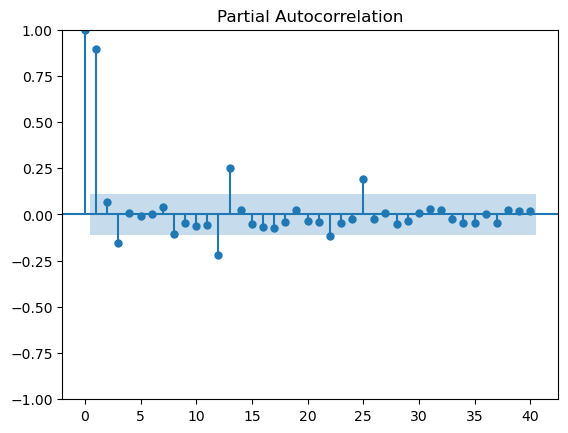

1     1.000000
2     0.898192
3     0.069028
4    -0.160987
5     0.008920
6    -0.006405
7     0.004782
8     0.044193
9    -0.108655
10   -0.050919
11   -0.068188
12   -0.062795
13   -0.237413
14    0.274115
15    0.029791
16   -0.062558
17   -0.072650
18   -0.078578
19   -0.044219
20    0.029360
21   -0.040246
22   -0.045373
23   -0.133210
24   -0.053311
25   -0.028565
dtype: float64

In [19]:
from statsmodels.tsa.stattools import pacf
import statsmodels.api as sm
import matplotlib.pyplot as plt
y
sm.graphics.tsa.plot_pacf(y, lags=40, method="ywm")
plt.show()
p = pacf(y)
pd.Series(p, index=range(1, len(p) +1 ))